## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

- Does left-handedness increase with education?
- As mathmatical inclination grows, how does this impact left-handedness? 
- Is there a difference in dominant hand between the US and other countries?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data.csv', sep='\t')

### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

**Answer**: We'd want to anonymously gather the data-- that is, no personal information can be associated to determine someone's gender/religion, for example. We'd also want to make sure the data was randomly selected, so as not to introduce any bias in the survey gathering process. Finally, in the gathering process itself, we would want to ensure the process was conducted blindly, to prevent any member of the team from inferring relationships between people and their data.

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [63]:
df.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2


In [64]:
df.Q3.value_counts()

1    1515
5    1112
4     641
3     461
2     444
0      11
Name: Q3, dtype: int64

In [65]:
df.isnull().sum().sum()

0

In [66]:
df.dtypes

Q1              int64
Q2              int64
Q3              int64
Q4              int64
Q5              int64
Q6              int64
Q7              int64
Q8              int64
Q9              int64
Q10             int64
Q11             int64
Q12             int64
Q13             int64
Q14             int64
Q15             int64
Q16             int64
Q17             int64
Q18             int64
Q19             int64
Q20             int64
Q21             int64
Q22             int64
Q23             int64
Q24             int64
Q25             int64
Q26             int64
Q27             int64
Q28             int64
Q29             int64
Q30             int64
Q31             int64
Q32             int64
Q33             int64
Q34             int64
Q35             int64
Q36             int64
Q37             int64
Q38             int64
Q39             int64
Q40             int64
Q41             int64
Q42             int64
Q43             int64
Q44             int64
introelapse     int64
testelapse

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Q1,4184.0,1.962715,1.360291,0.0,1.0,1.0,3.00,5.0
Q2,4184.0,3.829589,1.551683,0.0,3.0,5.0,5.00,5.0
Q3,4184.0,2.846558,1.664804,0.0,1.0,3.0,5.00,5.0
Q4,4184.0,3.186902,1.476879,0.0,2.0,3.0,5.00,5.0
Q5,4184.0,2.865440,1.545798,0.0,1.0,3.0,4.00,5.0
Q6,4184.0,3.672084,1.342238,0.0,3.0,4.0,5.00,5.0
Q7,4184.0,3.216539,1.490733,0.0,2.0,3.0,5.00,5.0
Q8,4184.0,3.184512,1.387382,0.0,2.0,3.0,4.00,5.0
Q9,4184.0,2.761233,1.511805,0.0,1.0,3.0,4.00,5.0
Q10,4184.0,3.522945,1.242890,0.0,3.0,4.0,5.00,5.0


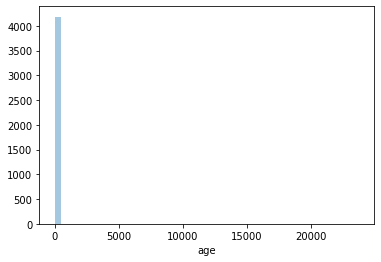

In [68]:
sns.distplot(df.age, kde=False);

In [69]:
df.age.sort_values(ascending=False).head()

2690    23763
2137      409
2075      123
2101       86
1736       86
Name: age, dtype: int64

In [70]:
df.loc[(df.age > 100), 'age']

2075      123
2137      409
2690    23763
Name: age, dtype: int64

In [71]:
df.drop([2075, 2137, 2690],inplace=True)

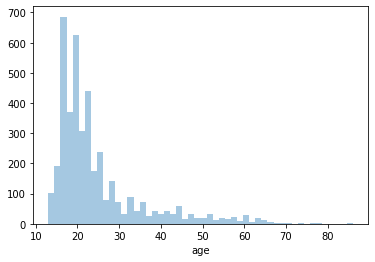

In [72]:
sns.distplot(df.age, kde=False);

In [73]:
df.select_dtypes(include='object').columns

Index(['country'], dtype='object')

In [74]:
hand_dummies = pd.get_dummies(df.country, drop_first=True)

In [75]:
df.shape, hand_dummies.shape

((4181, 56), (4181, 93))

In [76]:
hand = pd.concat([df,hand_dummies],axis=1);

In [77]:
hand.shape

(4181, 149)

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: This is a classification problem, because the outcome here is binary -- either we predict the person is left-handed, or that they are not left-handed.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer:  Variable standardization is important here because KNN relies on distance metrics. Because the scales of various metrics can vary drastically, so it's important to normalize these scales. A good outside example of why we would do this is in predicting if someone will be accepted into college or not based on a variety of predictors. GPA and household income, for example, are extremely different and difficult to compare without standardization.

### 7. Give an example of when we might not standardize our variables.

Answer: When running regression and you want to produce coefficients that are explainable/interpretable, this may be a bad idea. Scaling reduces our ability to easily explain in basic terms what is happens with our features in relationship to our target.

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: Yes. Althought Q1-Q44 are on the same 1-5 point scale, it's best practice to scale your predictors. We're not dealing with significantly different magnitudes in this case, but as scaling factors in the average and std deviation for each question, it will enable us to more accurately assess distance between the variables.

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: 

In [78]:
df.hand.value_counts()

1    3541
2     452
3     178
0      10
Name: hand, dtype: int64

In [79]:
df = df.loc[df.hand > 0]

In [80]:
df.hand.value_counts()

1    3541
2     452
3     178
Name: hand, dtype: int64

In [81]:

# colors = ['red', 'yellow', 'orange']
# color_series = df['hand'].map(lambda s: colors[s])
# plt.scatter(df['age'], df['race'], color=color_series)

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: It may be a bad idea because lower K values can result in unstable decision boundaries, while a high k can result in classifying everything as the most probable class. We need to do some testing to understand what the right k value is as it varies highly from dataset to dataset.

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [82]:
df.select_dtypes(include='object').columns

Index(['country'], dtype='object')

In [83]:
X = df.drop(columns=['hand','country'])
y = df['hand']

In [84]:
X.shape, y.shape

((4171, 54), (4171,))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=4)

In [86]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [87]:
knn3= KNeighborsClassifier(n_neighbors=3)
knn5= KNeighborsClassifier(n_neighbors=5)
knn15= KNeighborsClassifier(n_neighbors=15)
knn25= KNeighborsClassifier(n_neighbors=25)

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: Yes, regularization is applied by default. The default is L2, it's listed in the documentation.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer: Standardization is required for regularization, so it's advisable to do this.

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Instantiate and fit your model.

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)
lr.fit(X_train_sc, y_train)

C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
pd.DataFrame(np.exp(lr.coef_)).T.head()

,0,1,2
0,0.970333,0.929849,1.278622
1,0.986635,1.037316,0.947867
2,0.974655,1.000867,1.056249
3,0.963332,0.929702,1.425384
4,0.962733,1.092724,0.911093


In [90]:

print(f'Logistic Regression predicted probabilities: \n{lr.predict_proba(X_train_sc)}')

Logistic Regression predicted probabilities: 
[[0.87096964 0.10545242 0.02357794]
 [0.83336567 0.12485914 0.04177519]
 [0.89532461 0.08971632 0.01495907]
 ...
 [0.80001351 0.06046795 0.13951853]
 [0.91804064 0.04575638 0.03620299]
 [0.88214869 0.03832061 0.0795307 ]]


In [91]:
print(lr.score(X_train_sc,y_train))
print(lr.score(X_test_sc,y_test))

0.8462230215827338
0.859880239520958


---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

Answer: I don't think there is a strong logical connection between the questions asked, and dominant hand. Religion, for example, is a feature that should truly have no bearing. For that reason, I am surprised at the scores being returned here-- the logistic regression model accuracy is returning **0.84**, which feels high.

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

In [92]:
print(f'Logistic Regression Accuracy Score: {cross_val_score(lr, X_test_sc, y_test).mean()}')

C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Accuracy Score: 0.8227396577361766


C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [93]:
print(cross_val_score(knn3, X_train_sc, y_train, cv=5))
print(cross_val_score(knn5, X_train_sc, y_train, cv=5))
print(cross_val_score(knn15, X_train_sc, y_train, cv=5))
print(cross_val_score(knn25, X_train_sc, y_train, cv=5))

[0.80568012 0.82035928 0.82458771 0.81981982 0.82582583]
[0.82361734 0.83233533 0.83658171 0.82882883 0.83783784]
[0.8445441  0.84431138 0.84707646 0.84684685 0.84684685]
[0.8445441  0.84580838 0.84707646 0.84684685 0.84684685]


Answer:

In [94]:
print(cross_val_score(knn3, X_train_sc, y_train, cv=5).mean())
print(cross_val_score(knn5, X_train_sc, y_train, cv=5).mean())
print(cross_val_score(knn15, X_train_sc, y_train, cv=5).mean())
print(cross_val_score(knn25, X_train_sc, y_train, cv=5).mean())

0.8192545505622325
0.8318402088931636
0.8459251256746981
0.8462245268723029


In [95]:
knn3.fit(X_train_sc, y_train)
print(cross_val_score(knn3, X_test_sc, y_test, cv=5).mean())

knn5.fit(X_train_sc, y_train)
print(cross_val_score(knn5, X_test_sc, y_test, cv=5).mean())

knn15.fit(X_train_sc, y_train)
print(cross_val_score(knn15, X_test_sc, y_test, cv=5).mean())


knn25.fit(X_train_sc, y_train)
print(cross_val_score(knn25, X_test_sc, y_test, cv=5).mean())

0.8204446172885568
0.8479333483884159
0.8599026940771626
0.8599026940771626


### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

The accuracy score with a low KNN (3 in this case) suggests that we are overfit to our training data. The same pattern is exhibited in both the test and train data application. That being said, when comparing training to test data, I'm not seeing any evidence of a worse accuracy for the unseen data which would suggest high variance/overfitting.

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: As k increases, variance decreases. This is because we are enabling the model to take more information into account when executing it's classification algorithm. In the case where k=1, this is low bias because we are fitting our data to only one nearest point in our training data. That being said, I was expected the accuracy against my test data to be lower at k=3 relative to my training data, so I am a little bit lost on this question.

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:

 - Increase k. This is probably the best place to start as it allows your classification mechanism to take more information into account. However, as k scales, we may miss out on the local structures/relationships between our predictors, this would be "underfitting."
 - Adjust the weightings - maybe a predictor variable in this context should have higher influence on classification. The default is equal influence across the data points captured for classification.
 - Adjust the p value. P is in referene to the generalized Minkowski model which allows us to toggle between manhattan/euclidean distance by leveraging this parameter.

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer: I'm not clear on this question, I believe we only constructed one model here.

# NOTE: In order to answer questions 21 through 23, you'll need knowledge of regularization, which we'll learn on Wedensday morning!

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: The C parameter as part of Logistic Regression refers to the regulariation strength in place for our LogReg model. The default is 1.0. The smaller the value, the higher the regularization strength. The bigger the value, the less regularization. Regularization in general is a method you can apply to your model to reduce variance. So through regularization, may see your bias increase, while variance decreases.  

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer:

In [96]:
from sklearn.linear_model import LogisticRegressionCV
lr_test = LogisticRegressionCV(Cs=100, penalty='l1', solver='liblinear', cv=5)
lr_test.fit(X_train_sc, y_train)
print("regularized scores")
print(lr_test.score(X_train_sc,y_train))
print(lr_test.score(X_test_sc,y_test))
print("non-regularized scores")
print(lr.score(X_train_sc,y_train))
print(lr.score(X_test_sc,y_test))

C:\Users\Owen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


regularized scores
0.8462230215827338
0.859880239520958
non-regularized scores
0.8462230215827338
0.859880239520958


### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: Adjust C which will determine regularization strength; consider adjusting the regularization type (l1, l2, etc.); adjust the number of Cs in the LogisticRegressionCV parameter.

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer: My accuracy score for a higher-k KNN model demonstrates a stronger accuracy score and balance between test and train data sets. so I would select this model.

### 25. Select your original logistic regression model (the one with no regularization). Interpret the coefficient for `Q1`.

In [97]:
np.exp(lr.coef_[:,0])

array([0.97033258, 0.92984868, 1.27862203])

Q1 refers to whether or not someone has studied gambling. To interpret our coefficients, we need to rase **e** to the power of our coefficient. When we do this we get the following results. If someone studies gambling...

 - They are 0.97 times as likely to be right handed
 - They are 0.93 times as likely to be left handed
 - They are 1.3 times as likely to be both right and left handed.
 
The finding here is that gambling doesn't seem to have an impact of left-handedness, but it does appear to have an impact on both-handedness.

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer: As stated above my accuracy score for a higher-k KNN model demonstrates a stronger accuracy score and balance between test and train data sets. so I would select this model.

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

In [98]:
X_train.shape

(3336, 54)

In [99]:
len(lr.coef_[0])

54

In [100]:
np.exp(lr.coef_[:,-1])

array([1.04155732, 0.91099532, 1.06806802])

Answer: Religion does not appear to have a signficant impact on left-handedness.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)